In [95]:
import os 
import pandas as pd
import seaborn as sns 
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
data=pd.read_excel('Raisin_Dataset.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


# Finding the null values in the dataset

In [97]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

# Splitting the dataset into X and y varaibles 

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
#Splitting of data into X and y 
X = data.drop('Class',axis=1)
y = data['Class']

# Displaying the similar features together 

In [100]:
data.groupby(['MajorAxisLength','MinorAxisLength']).size().reset_index()

,MajorAxisLength,MinorAxisLength,0
0,225.629541,144.618672,1
1,227.293792,191.109038,1
2,232.427848,208.152006,1
3,243.038280,210.114057,1
4,245.401295,150.245582,1
...,...,...,...
895,820.724022,352.193680,1
896,843.956653,323.190569,1
897,949.662672,293.386698,1
898,984.045491,367.279532,1


#  Plot graph for individual feature to show there distribution 

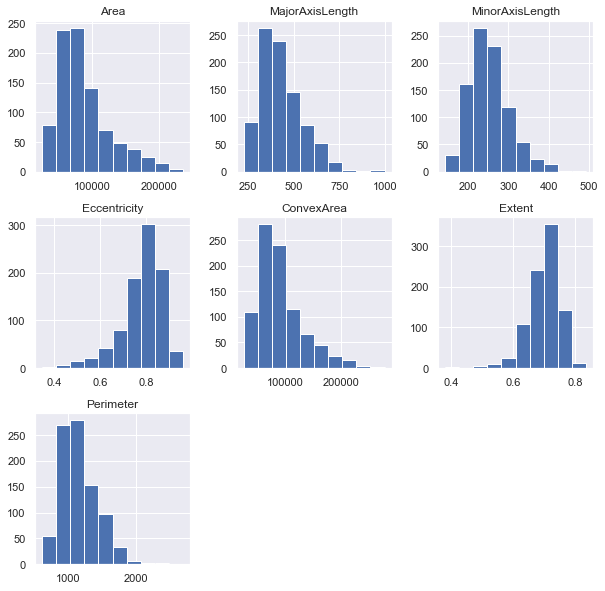

In [101]:
import matplotlib.pyplot as plt
data.hist(figsize=(10, 10), bins=10)
plt.show()

# Applying standard scaler 

In [102]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic regression model 

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

binary_reg = LogisticRegression(solver="newton-cg",random_state=42)
    
binary_reg.fit(X_train,y_train)
y_pred =binary_reg.predict(X_test)
binary_reg_accuracy =accuracy_score(y_test,y_pred)
y_lr_train_pred = binary_reg.predict(X_train)
y_lr_test_pred = binary_reg.predict(X_test)

# Logistic regression Accuracy 

In [60]:
print('accuracy score',binary_reg_accuracy)

accuracy score 0.8518518518518519


# Confusion matrix for Logistic regression model

C:\Users\SHAIK SHAFI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


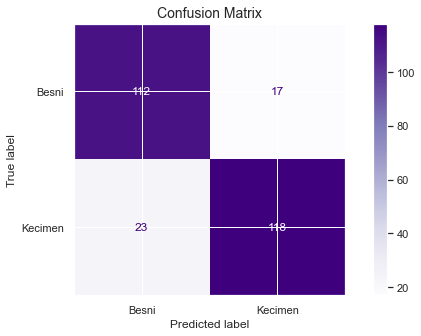

In [106]:
plot_confusion_matrix(binary_reg, X_test, y_test,cmap='Purples')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Ensemble learning using Logistic regression , KNN and SVM models 

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

logistic_classifier = LogisticRegression(solver="newton-cg", random_state=42)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC(kernel="linear", random_state=42)

voting_classifier = VotingClassifier(
    estimators=[('lr', logistic_classifier), ('knn', knn_classifier), ('svc', svm_classifier)],
    voting='hard')

# Training the ensemble 

In [63]:
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='newton-cg')),
                             ('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('svc', SVC(kernel='linear', random_state=42))])

# Accuracy for the Ensemble learning 

In [80]:
from sklearn.metrics import accuracy_score

for clf in (logistic_classifier, knn_classifier, svm_classifier, voting_classifier):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.85
KNeighborsClassifier 0.88
SVC 0.855
VotingClassifier 0.855


# Bagging in Decision tree Model 

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging_classifier = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=100,
    max_samples=50, bootstrap=True, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred = bagging_classifier.predict(X_test)
print('Accuracy score',accuracy_score(y_test, y_pred))

Accuracy score 0.912


# Confusion matrix for Bagging in Decision tree

C:\Users\SHAIK SHAFI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


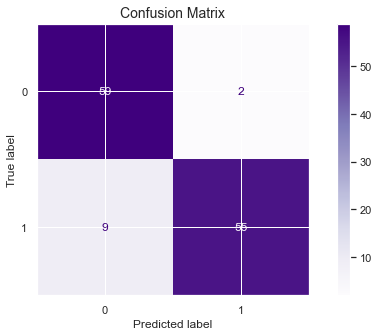

In [110]:
plot_confusion_matrix(bagging_classifier, X_test, y_test,cmap='Purples')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# SVM model 

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm =SVC(kernel='rbf',random_state=42)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm_accuracy =accuracy_score(y_test,y_pred)

# Accuracy for SVM 

In [76]:
print('Accuracy score is ',svm_accuracy)

Accuracy score is  0.896


# Confusion matrix for SVM model

C:\Users\SHAIK SHAFI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


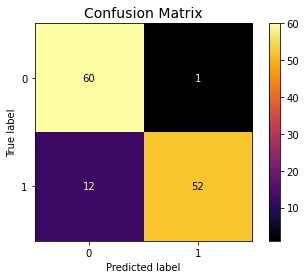

In [71]:
plot_confusion_matrix(svm, X_test, y_test,cmap='inferno')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# KNN Model

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_accuracy =accuracy_score(y_test, y_pred)
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

# Accuracy for KNN model 

In [73]:
print('accuracy',knn_accuracy)

accuracy 0.888


# Confusion matrix for KNN

C:\Users\SHAIK SHAFI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


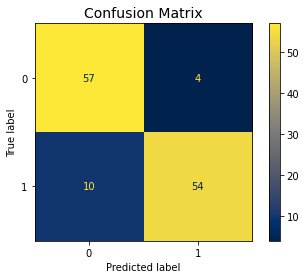

In [24]:
plot_confusion_matrix(knn, X_test, y_test,cmap='cividis')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

# Decision Tree model

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

binary_classification_dt =DecisionTreeClassifier(max_depth=4,random_state=42,criterion='gini')
binary_classification_dt.fit(X_train, y_train)
  
y_pred =binary_classification_dt.predict(X_test)
    
binary_classification_dt =accuracy_score(y_test, y_pred)

binary_classification_dt_microf1 =f1_score(y_test, y_pred, average='micro')
binary_classification_dt_macrof1 =f1_score(y_test, y_pred, average='macro') 

print('microf1',binary_classification_dt_microf1)
print('macrof1',binary_classification_dt_macrof1)

accuracy 0.875
microf1 0.875
macrof1 0.8749968749218731


# Accuracy for the Decision tree

In [78]:
print('accuracy',binary_classification_dt)

accuracy 0.875


# Multilayer perceptron in Neural networks 

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
mlp = Sequential([
        
      # dense layer 1
    Dense(256, activation='relu'),  
    
    # dense layer 2
    Dense(128, activation='relu'), 
    
     # dense layer 3
    Dense(128, activation='relu'), 
    
     # dense layer 4
    Dense(128, activation='relu'), 
    
      # output layer
    Dense(10, activation='sigmoid'),  
])

In [35]:
mlp.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

# Accuracy for MLP

In [36]:
raisin_net = mlp.fit(X_train, y_train, epochs=50, 
          batch_size=1000, 
          validation_split=0.2)

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.1157 - accuracy: 0.9458 - val_loss: 0.7742 - val_accuracy: 0.7833
Epoch 2/50
1/1 [==============================] - 0s 49ms/step - loss: 1.0244 - accuracy: 0.7750 - val_loss: 0.1379 - val_accuracy: 0.9667
Epoch 3/50
1/1 [==============================] - 0s 45ms/step - loss: 0.1720 - accuracy: 0.9042 - val_loss: 0.4275 - val_accuracy: 0.8167
Epoch 4/50
1/1 [==============================] - 0s 56ms/step - loss: 0.3882 - accuracy: 0.8625 - val_loss: 0.6477 - val_accuracy: 0.8000
Epoch 5/50
1/1 [==============================] - 0s 57ms/step - loss: 0.6129 - accuracy: 0.8375 - val_loss: 0.4200 - val_accuracy: 0.8333
Epoch 6/50
1/1 [==============================] - 0s 62ms/step - loss: 0.4591 - accuracy: 0.8583 - val_loss: 0.1423 - val_accuracy: 0.9333
Epoch 7/50
1/1 [==============================] - 0s 46ms/step - loss: 0.2385 - accuracy: 0.9167 - val_loss: 0.0735 - val_accuracy: 0.9500
Epoch 8/50
1/1 [=============

# Accuracies in tabular form for SVM ,logistic regression ,KNN,Decision tree

In [81]:
All_model_accuracy = pd.DataFrame({
    'Models': ['Logistic Regression', 'K Nearest Neighbours', 'Decision Tree','SVM'],
    'Accuracy_Score': [binary_reg_accuracy,knn_accuracy,binary_classification_dt,svm_accuracy]})
All_model_accuracy.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score
3,SVM,0.896000
1,K Nearest Neighbours,0.888000
2,Decision Tree,0.875000
0,Logistic Regression,0.851852


# Accuracy for the  MLP in Neural network 

In [ ]:
All_model_accuracy = pd.DataFrame({
    'Models': ['Neural networks'],
    'Accuracy_Score': [raisin_net]})
All_model_accuracy.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score
0,Neural networks,<keras.callbacks.History object at 0x000002161...


# output  data columns which belongs to Kecimen Raisin type 

In [85]:
data[data['Class']=='Kecimen'].groupby('Area').size()

Area
25387     1
26908     1
28216     1
31237     1
31275     1
         ..
110616    1
111450    1
114648    1
136340    1
180898    1
Length: 450, dtype: int64

# output  data columns which belongs to Besni Raisin type 

In [86]:
data[data['Class']=='Besni'].groupby('Area').size()

Area
40702     1
45051     1
47253     1
47609     1
48007     1
         ..
218459    1
222915    1
223075    1
225043    1
235047    1
Length: 450, dtype: int64

# Plotting graph for some models

<AxesSubplot:xlabel='Models', ylabel='Accuracy_Score'>

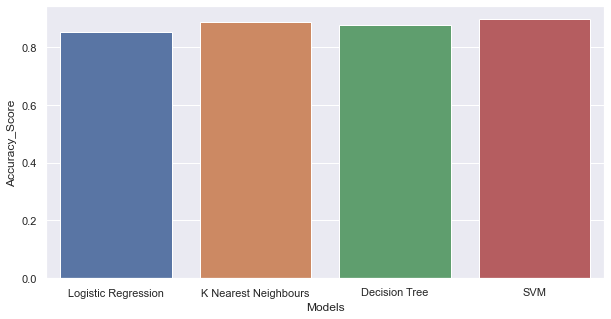

In [82]:
sns.set(rc={'figure.figsize':(10,5)})
All_Models = All_model_accuracy['Models']
Accuracy_Score = All_model_accuracy['Accuracy_Score']

sns.barplot(x=All_Models, y=Accuracy_Score)